In [1]:
%load_ext autoreload
%autoreload 2

# pywatemsedem API

## Introduction

This tutorial describes the use of the classes and functions of the pywatemsedem Python package. This python package functions as a **model API** to prepare and process data to create all input-files for the WaTEM/SEDEM. The Python package also contains functions for post-processing the modeloutput, yet this is not handled in this notebook.

__Note__:

The example data available in the subfolder ``data/langegracht`` is preclipped to the catchment shape. Do note that out-of-bound rasters and shapes are automatically clipped by the inputted catchment vector or raster data layer, as long as the clips fully overlay with the catchment outline (i.e. not missing values).

## Imports and example data

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import os

The example data are located in the test data folder

In [3]:
inputdata_folder = Path(r"..") / ".." / "tests" /  "data"

In [4]:
inputdata_folder.exists()

True

## Define WaTEM/SEDEM exe
Pick it up the latest version from https://github.com/watem-sedem/watem-sedem/releases and put the exe in the folder of this notebook (or in a ``.env``-file)

In [5]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())

True

In [6]:
watem_sedem_binary = Path(os.environ.get("WATEMSEDEM"))

In [7]:
watem_sedem_binary

PosixPath('/nas/homes/sacha-1000009/GitHub/watem-sedem/cn_ws/cn_ws')

In [8]:
watem_sedem_binary.exists()

True

In [9]:
watem_sedem_binary

PosixPath('/nas/homes/sacha-1000009/GitHub/watem-sedem/cn_ws/cn_ws')

In [10]:
import sys

## Generate catchment


In [11]:
from pywatemsedem.catchment import Catchment

Give your catchment a name

In [12]:
name_catchment = 'langegracht'

Initialize the catchment with a **catchment vector** definition and a **dtm raster**.

In [13]:
rst_dtm = inputdata_folder  / "dtm.tif"

In [14]:
vct_catchment = inputdata_folder / "catchm_langegracht.shp"

In [15]:
vct_catchment.exists()

True

In [16]:
str(vct_catchment.resolve())

'/nas/homes/sacha-1000009/GitHub/pywatemsedem/tests/data/catchm_langegracht.shp'

Feed the **name** of the catchment, the **outline vector**, the **dtm raster**, the desired **resolution**, the desired **coordinate definition**, the **nodata-value** and the **year**.

In [17]:
catchment = Catchment(name_catchment, vct_catchment, rst_dtm, 20, 31370, -9999)

/nas/homes/sacha-1000009/GitHub/pywatemsedem/src/pywatemsedem/catchment.py:165: UserWarning: Setting results folder to /nas/homes/sacha-1000009/GitHub/pywatemsedem/docs/getting-started/langegracht
  warnings.warn(msg)


Plot the mask

(<Figure size 1000x1000 with 2 Axes>, <Axes: >)

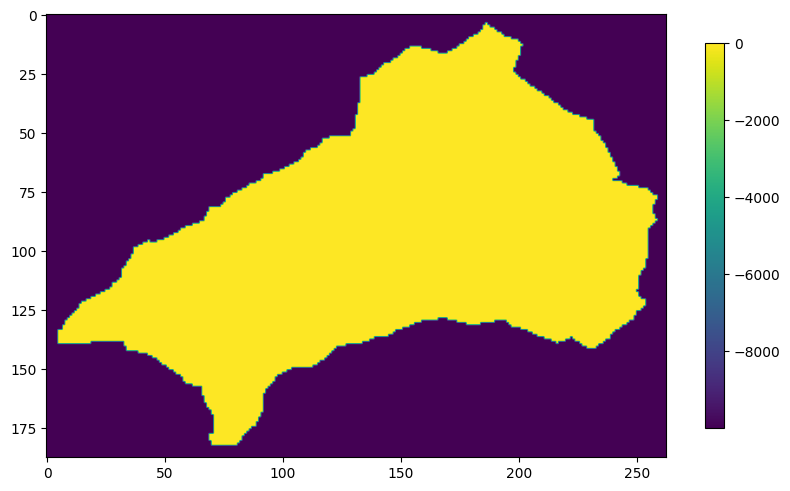

In [18]:
catchment.mask.plot()

Plot DTM

(<Figure size 1000x1000 with 2 Axes>, <Axes: >)

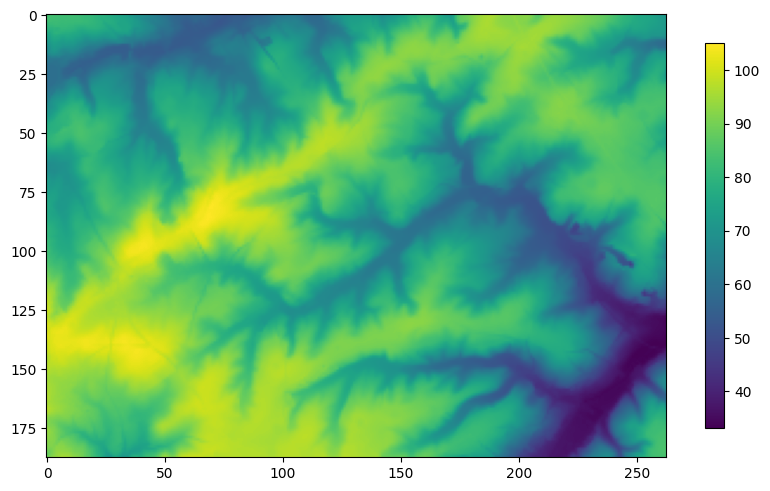

In [19]:
catchment.dtm.plot()

### Input rasters

Clip the land-use, K-factor and CN soil type maps and convert to the right data format by the functions below

In [20]:
rst_kfactor = inputdata_folder / "K3.tif"
rst_landuse = inputdata_folder / "basemap_landuse.tif"

In [21]:
catchment.kfactor = rst_kfactor

(<Figure size 1000x1000 with 2 Axes>, <Axes: >)

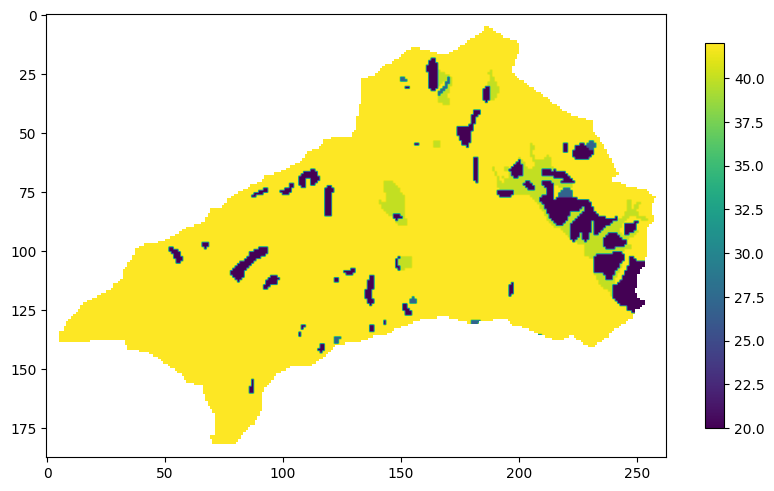

In [22]:
catchment.kfactor.plot(nodata=-9999)

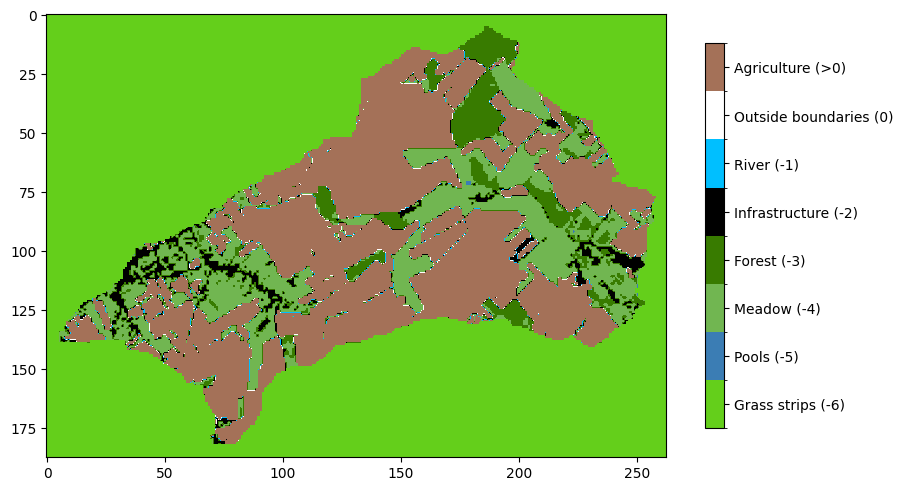

In [23]:
catchment.landuse = rst_landuse
catchment.landuse.plot()

### Input vectors
Rivers and infrastructure

In [24]:
vct_river = inputdata_folder / "river.shp"
vct_infra_poly = inputdata_folder / "infrastructure.shp"
vct_infra_line = inputdata_folder / "roads.shp"
vct_water = inputdata_folder / "water.shp"

Assigning the river vector will generate:  
- A river raster (with values -1 for river, else nodata/0)  
- A river segments (values for every river segment)

In [25]:
catchment.vct_river = vct_river

<Axes: >

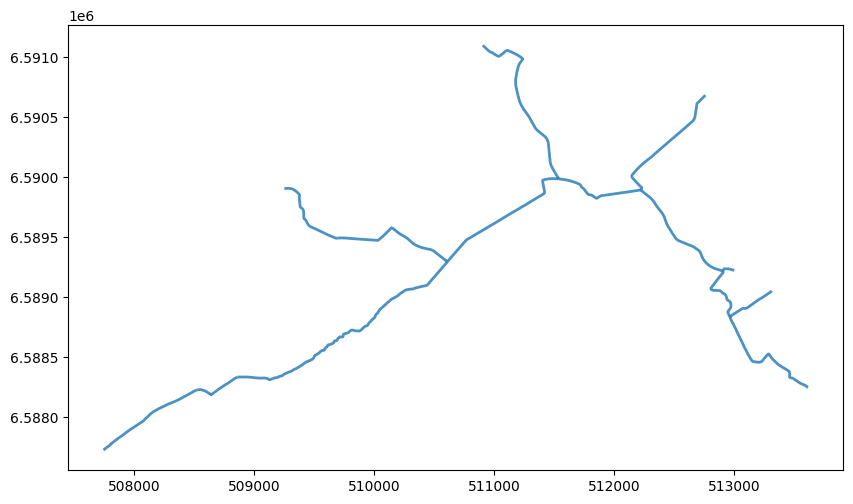

In [26]:
catchment.vct_river.plot()

(<Figure size 1000x1000 with 2 Axes>, <Axes: >)

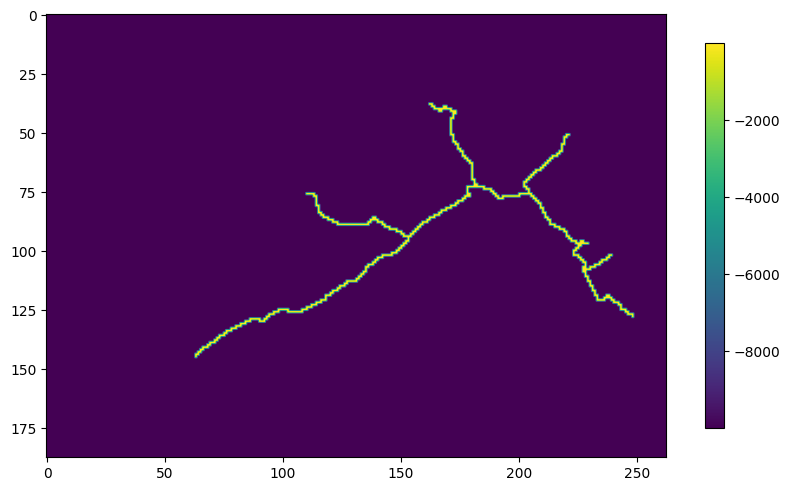

In [27]:
catchment.river.plot()

You can also have a look at the extracted segment

(<Figure size 1000x1000 with 2 Axes>, <Axes: >)

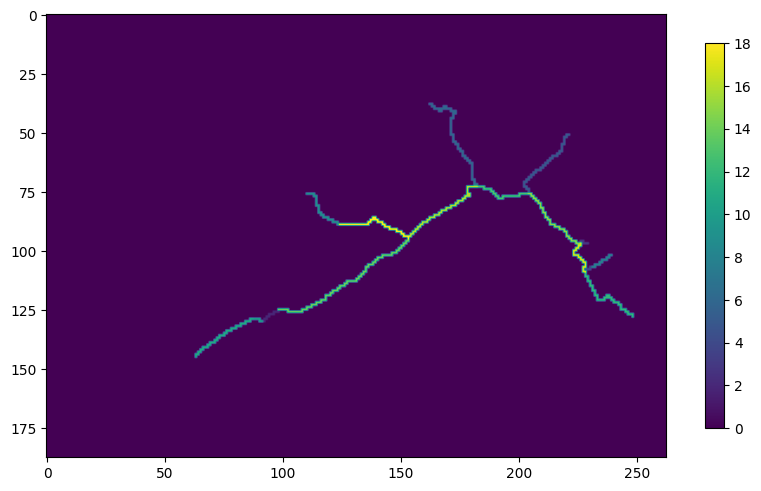

In [28]:
catchment.segments.plot()

Assign and plot infrastructure polygons and lines

(<Figure size 1000x1000 with 2 Axes>, <Axes: >)

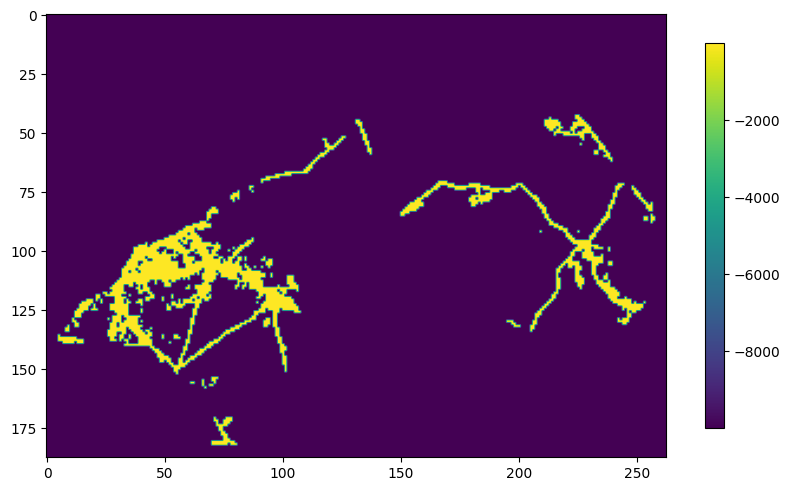

In [29]:
catchment.vct_infrastructure_buildings = vct_infra_poly
catchment.infrastructure_buildings.plot()

(<Figure size 1000x1000 with 2 Axes>, <Axes: >)

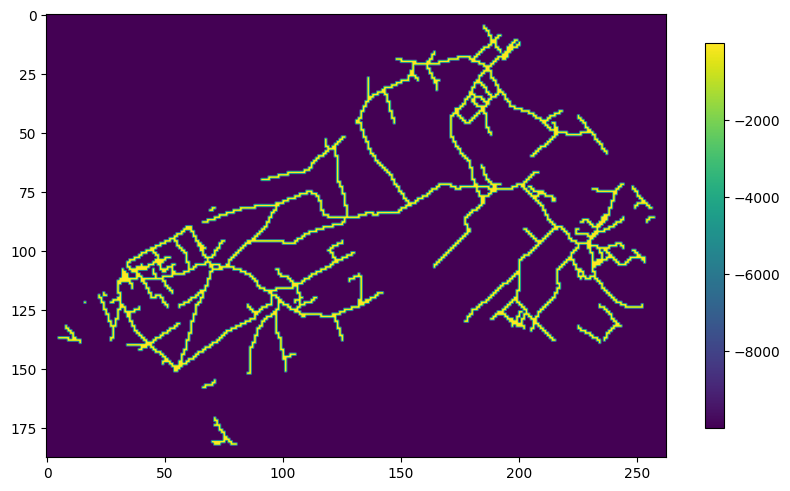

In [30]:
catchment.vct_infrastructure_roads = vct_infra_line
catchment.infrastructure_roads.plot()

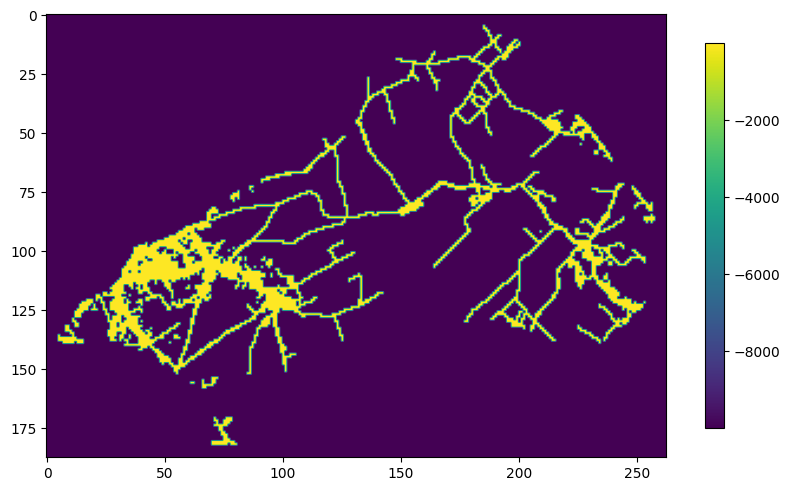

In [31]:
catchment.infrastructure.plot()

(<Figure size 1000x1000 with 2 Axes>, <Axes: >)

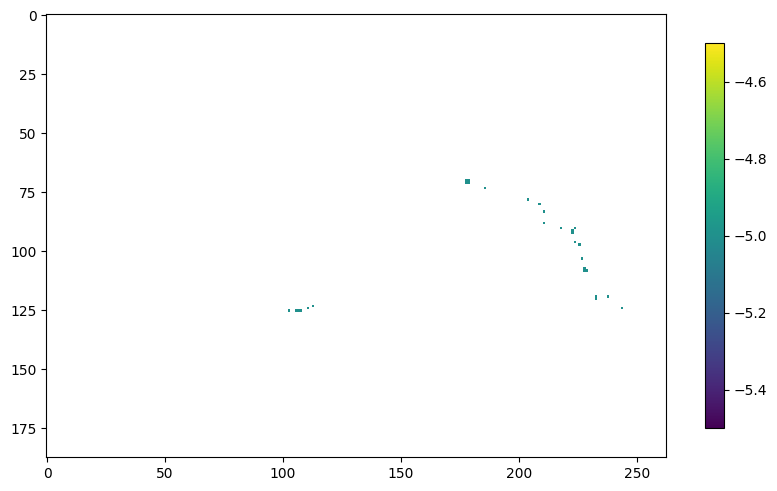

In [32]:
catchment.vct_water = vct_water
catchment.water.plot(nodata=-9999)

## The UserChoices-object

The second element we have to defines is the user choices, variables and other paramters. We have chosen to define these choices in a different class/object. In this way the defined choices can be re-used in calculations for e.g. a different catchment. 

First, we need to initiate a UserChoices-object

In [33]:
from pywatemsedem.userchoices import UserChoices

In [34]:
choices = UserChoices()

Make use of a preset default values for choices

In [35]:
default_choices = inputdata_folder / "userchoices.ini"

In [36]:
default_choices.exists()

True

In [37]:
choices.set_ecm_options(default_choices)
choices.dict_ecm_options

Include buffers is not given in the ECM options, default value (0) is used
UseGras is not given in the ECM options, default value (0) is used
Include dams is not given in the ECM options, default value (0) is used
Include ditches is not given in the ECM options, default value (0) is used
UseTeelttechn is not given in the ECM options, default value (0) is used


{'Include buffers': 0,
 'UseGras': 0,
 'Include dams': 0,
 'Include ditches': 0,
 'UseTeelttechn': 0}

In [38]:
choices.set_model_version("WS")

In [39]:
choices.set_model_options(default_choices)

`Convert output` is not given in the model options, default value `0` is used.
`Manual outlet selection` is not given in the model options, default value `0` is used.
`Include sewers` is not given in the model options, default value `0` is used.
`UserProvidedKTC` is not given in the model options, default value `1` is used.
`Adjusted Slope` is not given in the model options, default value `1` is used.
`Buffer reduce Area` is not given in the model options, default value `1` is used.
`Force Routing` is not given in the model options, default value `0` is used.
`FilterDTM` is not given in the model options, default value `0` is used.
`River Routing` is not given in the model options, default value `1` is used.
`OnlyInfraSewers` is not given in the model options, default value `1` is used.
`Maximize grass strips` is not given in the model options, default value `0` is used.
`Estimate clay content` is not given in the model options, default value `0` is used.
`Calculate Tillage Erosion` is

In [40]:
choices.set_model_variables(default_choices)
choices.dict_variables

`Parcel connectivity cropland` is not given in the model variables, default value (90) is used.
`Parcel connectivity forest` is not given in the model variables, default value (30) is used.
`Parcel connectivity grasstrips` is not given in the model variables, default value (100) is used.
`Parcel trapping efficiency cropland` is not given in the model variables, default value (0) is used.
`Parcel trapping efficiency forest` is not given in the model variables, default value (75) is used.
`Parcel trapping efficiency pasture` is not given in the model variables, default value (75) is used.
`begin_jaar` is not given in the model variables, default value (2018) is used.
`begin_maand` is not given in the model variables, default value (4) is used.
`Max kernel` is not given in the model variables, default value (3) is used.
`Max kernel river` is not given in the model variables, default value (3) is used.
`Bulk density` is not given in the model variables, default value (1350) is used.
`LS co

{'Only WS': 1,
 'Parcel connectivity cropland': 90,
 'Parcel connectivity forest': 30,
 'Parcel connectivity grasstrips': 100,
 'Parcel trapping efficiency cropland': 0,
 'Parcel trapping efficiency forest': 75,
 'Parcel trapping efficiency pasture': 75,
 'begin_jaar': 2018,
 'begin_maand': 4,
 'Max kernel': 3,
 'Max kernel river': 3,
 'Bulk density': 1350,
 'LS correction': 1.0,
 'ktc low': 1.0,
 'ktc high': 9.0,
 'ktc limit': 0.1,
 'R factor': 1250}

In [41]:
choices.set_output(default_choices)
choices.dict_output

`Write aspect` is not given in the model options, default value (1) is used.
`Write LS factor` is not given in the model options, default value (1) is used.
`Write slope` is not given in the model options, default value (1) is used.
`Write upstream area` is not given in the model options, default value (1) is used.
`Output per river segment` is not given in the model options, default value (1) is used.
`Write routing table` is not given in the model options, default value (1) is used.
`Write RUSLE` is not given in the model options, default value (1) is used.
`Write sediment export` is not given in the model options, default value (1) is used.
`Write water erosion` is not given in the model options, default value (1) is used.


{'Write rainfall excess': 0,
 'Write total runoff': 0,
 'Write aspect': 1,
 'Write LS factor': 1,
 'Write slope': 1,
 'Write upstream area': 1,
 'Output per river segment': 1,
 'Write routing table': 1,
 'Write RUSLE': 1,
 'Write sediment export': 1,
 'Write water erosion': 1}

## The Scenario-object

With the defined catchment and all the choices made by the user we can start to prepare all the necessary inputdata for a scenario.  

A scenario-instance needs a valid catchment-instance and a valid userchoices-instance to be initiated. Here, we will use the catchment created above. Also as scenario-number is needed. 

In [42]:
from pywatemsedem.scenario import Scenario

In [94]:
scenario_nr = 1
scenario = Scenario(catchment, 2019, scenario_nr, choices)

Add parcels information

In [95]:
scenario.vct_parcels = inputdata_folder / r"parcels.shp"

In [96]:
scenario.vct_parcels.geodata

,CODE,LANDUSE,C_crop,C_reduct,geometry,NR
0,60.0,-4.0,0.01,0,"POLYGON ((166189.93 168181.86, 166252 168116.5...",0
1,311.0,-9999.0,0.37,0,"POLYGON ((166881.62 168386.75, 166844.37 16843...",1
2,60.0,-4.0,0.01,0,"POLYGON ((167364.5 167424.16, 167335.62 167451...",2
3,60.0,-4.0,0.01,0,"POLYGON ((165493.01 167728.96, 165500.08 16771...",3
4,311.0,-9999.0,0.37,0,"POLYGON ((165014.48 167336.31, 165024.61 16734...",4
...,...,...,...,...,...,...
388,311.0,-9999.0,0.37,0,"POLYGON ((164878.49 168244.83, 164768.72 16820...",388
389,311.0,-9999.0,0.37,0,"POLYGON ((164738.75 168372.43, 164741 168367.2...",389
390,91.0,-9999.0,0.37,0,"POLYGON ((165022 168801.65, 165018.83 168778.5...",390
391,311.0,-9999.0,0.37,0,"POLYGON ((165084.85 167598.97, 164982.2 167536...",391


(<Figure size 1000x1000 with 2 Axes>, <Axes: >)

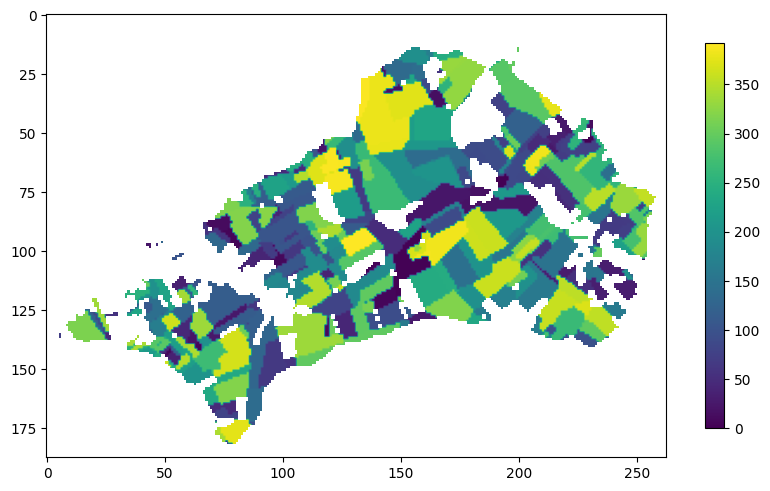

In [97]:
scenario.parcels.plot(nodata=-9999)

### Run model without any measures

In [98]:
scenario.composite_landuse = scenario.create_composite_landuse()

/nas/homes/sacha-1000009/GitHub/pywatemsedem/src/pywatemsedem/scenario.py:636: UserWarning: 'UseGras' in 'dict_ecm_options' is equal to 0. Will not include grass strips.
  " strips."
/nas/homes/sacha-1000009/GitHub/pywatemsedem/src/pywatemsedem/scenario.py:1268: UserWarning: Will not include grass strips in composite landuse.
  # preprocess grass strips


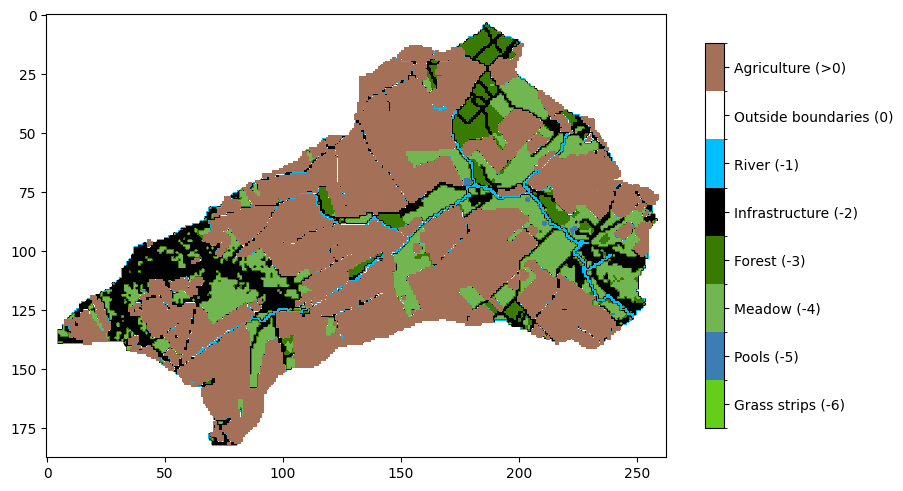

In [99]:
scenario.composite_landuse.plot()

In [104]:
scenario.cfactor = scenario.create_cfactor(bool(choices.dict_ecm_options["UseTeelttechn"]))

(<Figure size 1000x1000 with 2 Axes>, <Axes: >)

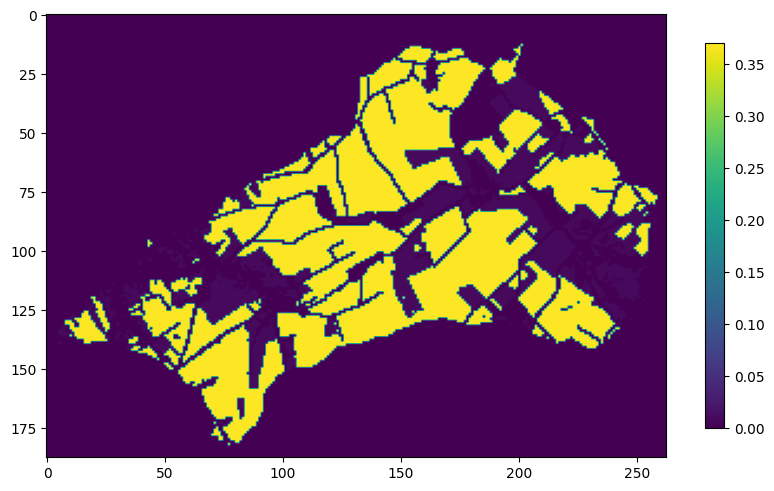

In [108]:
scenario.cfactor.plot()

In [106]:
scenario.ktc = scenario.create_ktc(choices.dict_variables["ktc low"],
                                   choices.dict_variables["ktc high"],
                                   choices.dict_variables["ktc limit"],
                                   choices.dict_model_options["UserProvidedKTC"])

(<Figure size 1000x1000 with 2 Axes>, <Axes: >)

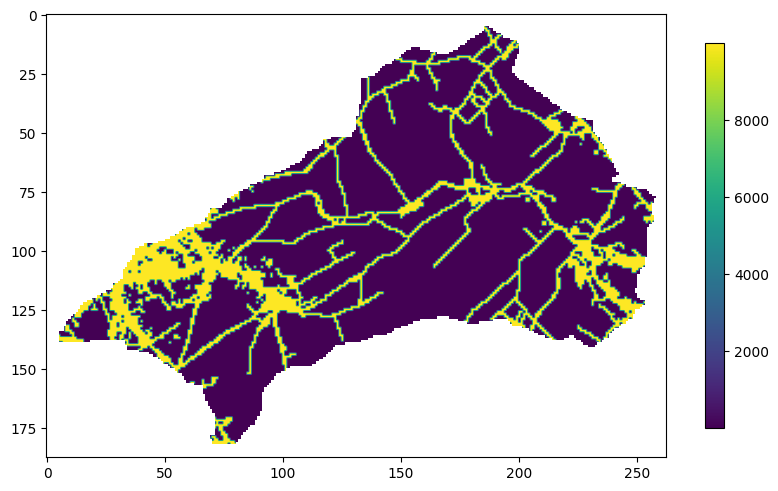

In [110]:
scenario.ktc.plot(nodata=-9999)

In [107]:
scenario.prepare_input_files()

/nas/homes/sacha-1000009/GitHub/pywatemsedem/src/pywatemsedem/scenario.py:783: UserWarning: Option 'Include buffers' in erosion control measure options is 0, returning None
  warnings.warn(msg)


In [111]:
scenario.create_ini_file()

In [112]:
scenario.run_model(watem_sedem_binary)

### Run model with grass strips

In [43]:
scenario_nr = 2
scenario = Scenario(catchment, 2019, scenario_nr, choices)
scenario.vct_parcels = inputdata_folder / r"parcels.shp"

Assign grass strips

In [44]:
scenario.vct_grass_strips = inputdata_folder / r"grass_strips.shp"

<Axes: >

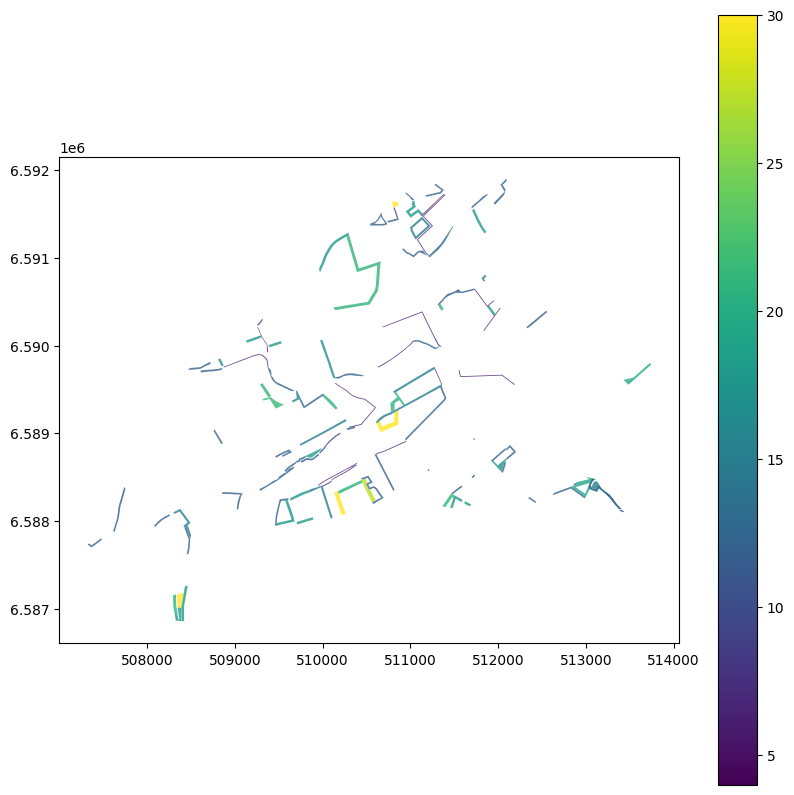

In [45]:
scenario.vct_grass_strips.plot(column="width")

In [46]:
scenario.choices.dict_ecm_options["UseGras"] = 1

In [48]:
scenario.composite_landuse = scenario.create_composite_landuse()

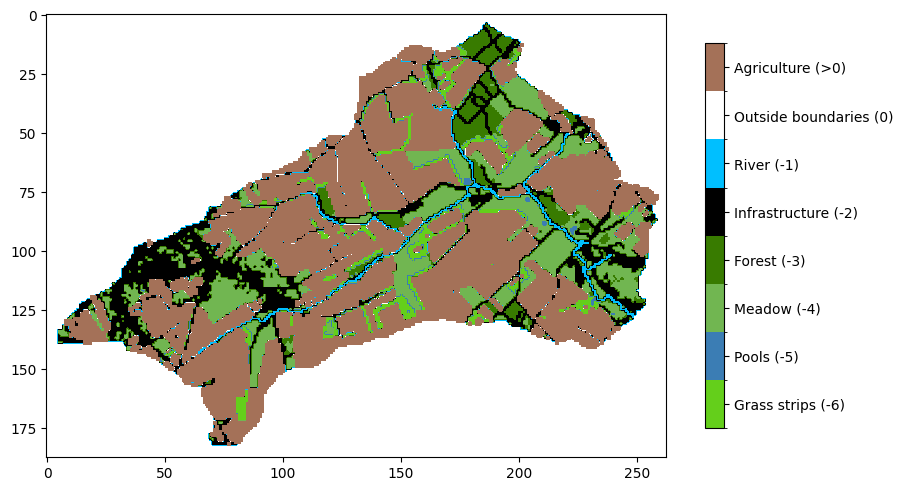

In [49]:
scenario.composite_landuse.plot()

In [51]:
scenario.cfactor = scenario.create_cfactor(bool(choices.dict_ecm_options["UseTeelttechn"]))

In [52]:
scenario.ktc = scenario.create_ktc(choices.dict_variables["ktc low"],
                                   choices.dict_variables["ktc high"],
                                   choices.dict_variables["ktc limit"],
                                   choices.dict_model_options["UserProvidedKTC"])

Prepare run and execute

In [53]:
scenario.prepare_input_files()
scenario.create_ini_file()
scenario.run_model(watem_sedem_binary)

/nas/homes/sacha-1000009/GitHub/pywatemsedem/src/pywatemsedem/scenario.py:783: UserWarning: Option 'Include buffers' in erosion control measure options is 0, returning None
  warnings.warn(msg)


### Run model with buffers

In [54]:
scenario_nr = 3
scenario = Scenario(catchment, 2019, scenario_nr, choices)
scenario.vct_parcels = inputdata_folder / r"parcels.shp"

In [55]:
scenario.vct_buffers = inputdata_folder / r"buffers.shp"

/nas/homes/sacha-1000009/GitHub/pywatemsedem/src/pywatemsedem/scenario.py:708: UserWarning: Include buffers' in 'dict_ecm_options' is equal to 0. Will not include buffers.
  warnings.warn(msg)


In [57]:
scenario.choices.dict_ecm_options["Include buffers"] = 1

In [58]:
scenario.composite_landuse = scenario.create_composite_landuse()
scenario.cfactor = scenario.create_cfactor(bool(choices.dict_ecm_options["UseTeelttechn"]))
scenario.ktc = scenario.create_ktc(choices.dict_variables["ktc low"],
                                   choices.dict_variables["ktc high"],
                                   choices.dict_variables["ktc limit"],
                                   choices.dict_model_options["UserProvidedKTC"])

/nas/homes/sacha-1000009/GitHub/pywatemsedem/src/pywatemsedem/scenario.py:638: UserWarning: 'UseGras' in 'dict_ecm_options' is equal to 0. Will not include grass strips.
  warnings.warn(msg)
/nas/homes/sacha-1000009/GitHub/pywatemsedem/src/pywatemsedem/scenario.py:1268: UserWarning: Will not include grass strips in composite landuse.
  warnings.warn(msg)


In [59]:
scenario.prepare_input_files()
scenario.create_ini_file()
scenario.run_model(watem_sedem_binary)

### Run model with technical tillage measures

In [61]:
scenario_nr = 4
scenario = Scenario(catchment, 2019, scenario_nr, choices)
scenario.vct_parcels = inputdata_folder / r"parcels.shp"

Technical tillage measures are implemented at the level of a parcel, for which we can define a "reduction". The column 'C_reduct' is used to reduce the final C-factor:

$$C_{factor,reduced}=C_{factor}∗(1-C_{reduction})$$

In [62]:
# We take all parcels with a crop code of 311 to reduce with 80 %.
scenario.vct_parcels.geodata.loc[scenario.vct_parcels.geodata["CODE"]==311, "C_reduct"] = 0.8

/tmp/ipykernel_1781431/774395007.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.8' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  scenario.vct_parcels.geodata.loc[scenario.vct_parcels.geodata["CODE"]==311, "C_reduct"] = 0.8


Enable source-oriented measures by setting 'UseTeelttechn' to one.

In [63]:
scenario.choices.dict_ecm_options['UseTeelttechn'] = 1

In [64]:
scenario.composite_landuse = scenario.create_composite_landuse()
scenario.cfactor = scenario.create_cfactor(bool(choices.dict_ecm_options["UseTeelttechn"]))
scenario.ktc = scenario.create_ktc(choices.dict_variables["ktc low"],
                                   choices.dict_variables["ktc high"],
                                   choices.dict_variables["ktc limit"],
                                   choices.dict_model_options["UserProvidedKTC"])

/nas/homes/sacha-1000009/GitHub/pywatemsedem/src/pywatemsedem/scenario.py:638: UserWarning: 'UseGras' in 'dict_ecm_options' is equal to 0. Will not include grass strips.
  warnings.warn(msg)
/nas/homes/sacha-1000009/GitHub/pywatemsedem/src/pywatemsedem/scenario.py:1268: UserWarning: Will not include grass strips in composite landuse.
  warnings.warn(msg)


In [65]:
scenario.prepare_input_files()
scenario.create_ini_file()
scenario.run_model(watem_sedem_binary)

/nas/homes/sacha-1000009/GitHub/pywatemsedem/src/pywatemsedem/scenario.py:783: UserWarning: Option 'Include buffers' in erosion control measure options is 0, returning None
  warnings.warn(msg)


In [66]:
scenario.create_ini_file()

In [67]:
scenario.run_model(watem_sedem_binary)

### Run model with forced routing

In [70]:
scenario_nr = 5
scenario = Scenario(catchment, 2019, scenario_nr, choices)
scenario.vct_parcels = inputdata_folder / r"parcels.shp"

In [71]:
scenario.choices.dict_model_options["Force Routing"] = 1

In [72]:
scenario.vct_force_routing = inputdata_folder / "force_routing.shp"

In [73]:
scenario.composite_landuse = scenario.create_composite_landuse()
scenario.cfactor = scenario.create_cfactor(bool(choices.dict_ecm_options["UseTeelttechn"]))
scenario.ktc = scenario.create_ktc(choices.dict_variables["ktc low"],
                                   choices.dict_variables["ktc high"],
                                   choices.dict_variables["ktc limit"],
                                   choices.dict_model_options["UserProvidedKTC"])

/nas/homes/sacha-1000009/GitHub/pywatemsedem/src/pywatemsedem/scenario.py:638: UserWarning: 'UseGras' in 'dict_ecm_options' is equal to 0. Will not include grass strips.
  warnings.warn(msg)
/nas/homes/sacha-1000009/GitHub/pywatemsedem/src/pywatemsedem/scenario.py:1268: UserWarning: Will not include grass strips in composite landuse.
  warnings.warn(msg)


In [74]:
scenario.prepare_input_files()
scenario.create_ini_file()
scenario.run_model(watem_sedem_binary)

/nas/homes/sacha-1000009/GitHub/pywatemsedem/src/pywatemsedem/scenario.py:783: UserWarning: Option 'Include buffers' in erosion control measure options is 0, returning None
  warnings.warn(msg)


In [75]:
scenario.create_ini_file()

In [76]:
scenario.run_model(watem_sedem_binary)

### Run model with specific outlets

In [77]:
scenario_nr = 6
scenario = Scenario(catchment, 2019, scenario_nr, choices)
scenario.vct_parcels = inputdata_folder / r"parcels.shp"

In [78]:
scenario.choices.dict_model_options

{'Convert output': 0,
 'Manual outlet selection': 0,
 'Include sewers': 0,
 'UserProvidedKTC': 1,
 'Adjusted Slope': 1,
 'Buffer reduce Area': 1,
 'Force Routing': 0,
 'FilterDTM': 0,
 'River Routing': 1,
 'OnlyInfraSewers': 1,
 'Maximize grass strips': 0,
 'Estimate clay content': 0,
 'Calculate Tillage Erosion': 0,
 'Create ktil map': 0,
 'Calibrate': 0}

In [79]:
scenario.choices.dict_model_options["Manual outlet selection"] = 1

In [80]:
scenario.vct_outlets = inputdata_folder / "outlets.shp"

In [81]:
scenario.composite_landuse = scenario.create_composite_landuse()
scenario.cfactor = scenario.create_cfactor(bool(choices.dict_ecm_options["UseTeelttechn"]))
scenario.ktc = scenario.create_ktc(choices.dict_variables["ktc low"],
                                   choices.dict_variables["ktc high"],
                                   choices.dict_variables["ktc limit"],
                                   choices.dict_model_options["UserProvidedKTC"])

/nas/homes/sacha-1000009/GitHub/pywatemsedem/src/pywatemsedem/scenario.py:638: UserWarning: 'UseGras' in 'dict_ecm_options' is equal to 0. Will not include grass strips.
  warnings.warn(msg)
/nas/homes/sacha-1000009/GitHub/pywatemsedem/src/pywatemsedem/scenario.py:1268: UserWarning: Will not include grass strips in composite landuse.
  warnings.warn(msg)


In [82]:
scenario.prepare_input_files()
scenario.create_ini_file()
scenario.run_model(watem_sedem_binary)

/nas/homes/sacha-1000009/GitHub/pywatemsedem/src/pywatemsedem/scenario.py:783: UserWarning: Option 'Include buffers' in erosion control measure options is 0, returning None
  warnings.warn(msg)


### Run model without parcels

In [83]:
scenario_nr = 7
scenario = Scenario(catchment, 2019, scenario_nr, choices)

In [ ]:
scenario.composite_landuse = scenario.create_composite_landuse()
scenario.cfactor = scenario.create_cfactor(bool(choices.dict_ecm_options["UseTeelttechn"]))
scenario.ktc = scenario.create_ktc(choices.dict_variables["ktc low"],
                                   choices.dict_variables["ktc high"],
                                   choices.dict_variables["ktc limit"],
                                   choices.dict_model_options["UserProvidedKTC"])

/nas/homes/sacha-1000009/GitHub/pywatemsedem/src/pywatemsedem/scenario.py:638: UserWarning: 'UseGras' in 'dict_ecm_options' is equal to 0. Will not include grass strips.
  warnings.warn(msg)
/nas/homes/sacha-1000009/GitHub/pywatemsedem/src/pywatemsedem/scenario.py:1268: UserWarning: Will not include grass strips in composite landuse.
  warnings.warn(msg)


In [ ]:
scenario.prepare_input_files()
scenario.create_ini_file()
scenario.run_model(watem_sedem_binary)

In [ ]:
from pywatemsedem.geo.rasters import AbstractRaster

In [88]:
d = AbstractRaster(None,None)

AttributeError: 'NoneType' object has no attribute 'shape'